# Descriptive Statistics: The Data Variability Using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
height_weight_data = pd.read_csv('datasets/500_Person_Gender_Height_Weight_Index.csv')

height_weight_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
height_weight_data.drop('Index', inplace=True, axis=1)

In [4]:
height_weight_data.shape

(500, 3)

In [5]:
num_records = height_weight_data.shape[0]

num_records

500

In [6]:
height_data = height_weight_data[['Height']].copy()

height_data.head()

,Height
0,174
1,189
2,185
3,195
4,149


In [7]:
weight_data = height_weight_data[['Weight']].copy()

weight_data.head()

,Weight
0,96
1,87
2,110
3,104
4,61


In [8]:
counts = [1] * num_records

height_data['counts_height'] = counts
weight_data['counts_weight'] = counts

In [9]:
weight_data = weight_data.sort_values('Weight')

weight_data.tail()

,Weight,counts_weight
157,160,1
330,160,1
106,160,1
204,160,1
287,160,1


In [10]:
height_data = height_data.sort_values('Height')

height_data.tail()

,Height,counts_height
85,198,1
103,198,1
326,199,1
160,199,1
100,199,1


In [11]:
height_data = height_data.groupby('Height', as_index=False).count()

height_data.head(10)

,Height,counts_height
0,140,8
1,141,8
2,142,9
3,143,3
4,144,5
5,145,9
6,146,9
7,147,7
8,148,5
9,149,5


In [12]:
weight_data = weight_data.groupby('Weight', as_index=False).count()

weight_data.head(10)

,Weight,counts_weight
0,50,9
1,51,4
2,52,5
3,53,1
4,54,8
5,55,1
6,56,4
7,57,5
8,58,4
9,59,3


In [13]:
height_data['cumcounts_height'] = height_data['counts_height'].cumsum()

height_data.head(10)

,Height,counts_height,cumcounts_height
0,140,8,8
1,141,8,16
2,142,9,25
3,143,3,28
4,144,5,33
5,145,9,42
6,146,9,51
7,147,7,58
8,148,5,63
9,149,5,68


In [14]:
weight_data['cumcounts_weight'] = weight_data['counts_weight'].cumsum()

weight_data.head(10)

,Weight,counts_weight,cumcounts_weight
0,50,9,9
1,51,4,13
2,52,5,18
3,53,1,19
4,54,8,27
5,55,1,28
6,56,4,32
7,57,5,37
8,58,4,41
9,59,3,44


### Interquartile Range

In [15]:
q1_height = height_weight_data['Height'].quantile(.25)

q1_height

156.0

In [16]:
q3_height = height_weight_data['Height'].quantile(.75)

q3_height

184.0

In [17]:
iqr_height = q3_height - q1_height

iqr_height

28.0

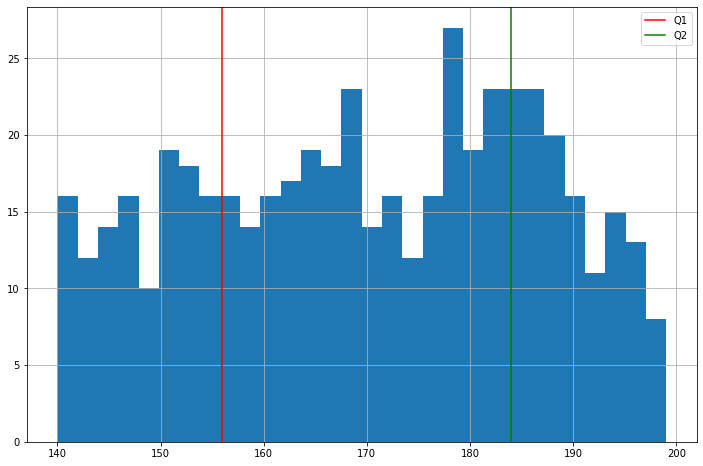

In [18]:
plt.figure(figsize=(12, 8))

height_weight_data['Height'].hist(bins=30)

plt.axvline(q1_height, color='r', label='Q1')
plt.axvline(q3_height, color='g', label='Q2')

plt.legend()

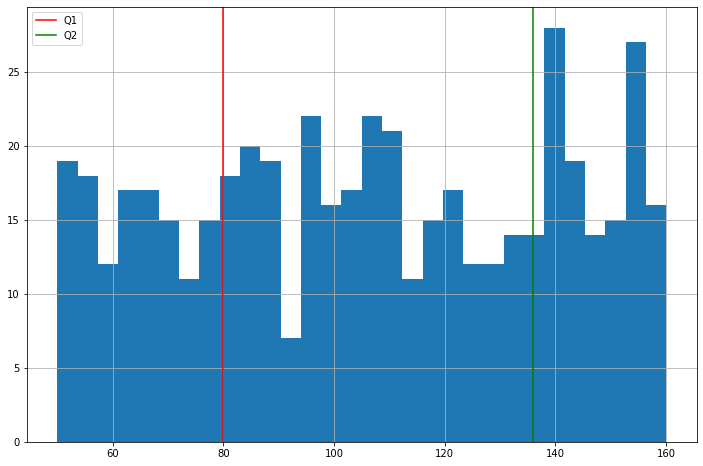

In [19]:
plt.figure(figsize=(12, 8))

height_weight_data['Weight'].hist(bins=30)

plt.axvline(height_weight_data['Weight'].quantile(.25), color='r', label='Q1')
plt.axvline(height_weight_data['Weight'].quantile(.75), color='g', label='Q2')

plt.legend()

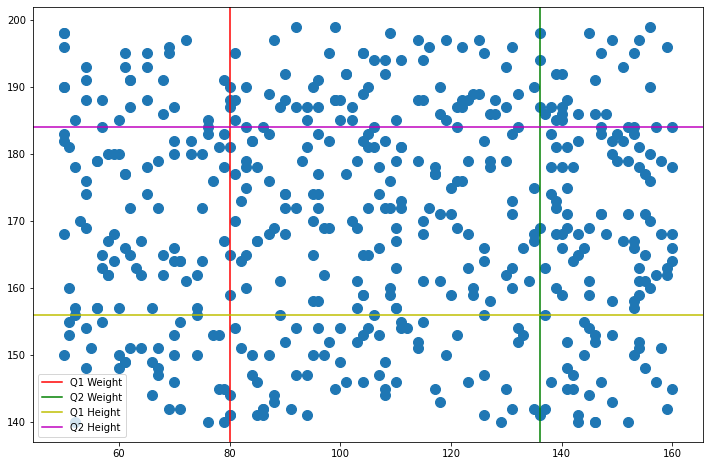

In [20]:
plt.figure(figsize=(12, 8))

plt.scatter(height_weight_data['Weight'], height_weight_data['Height'], s=100)

plt.axvline(height_weight_data['Weight'].quantile(.25), color='r', label='Q1 Weight')
plt.axvline(height_weight_data['Weight'].quantile(.75), color='g', label='Q2 Weight')

plt.axhline(height_weight_data['Height'].quantile(.25), color='y', label='Q1 Height')
plt.axhline(height_weight_data['Height'].quantile(.75), color='m', label='Q2 Height')

plt.legend()

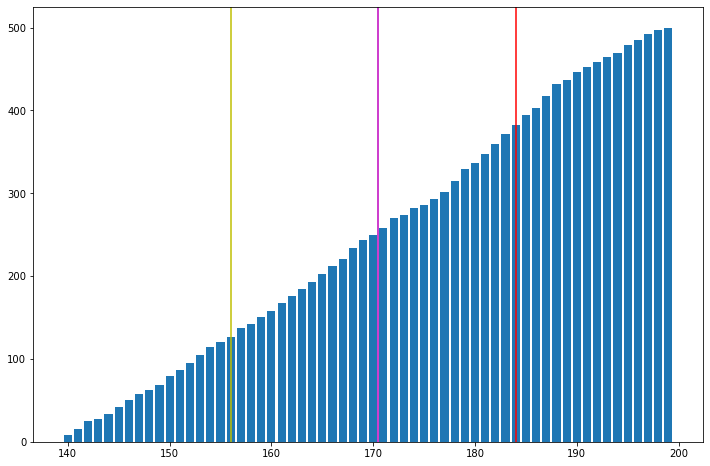

In [21]:
plt.figure(figsize=(12, 8))

plt.bar(height_data['Height'], height_data['cumcounts_height'])

plt.axvline(height_weight_data['Height'].quantile(.25), color='y', label='25%')
plt.axvline(height_weight_data['Height'].quantile(.50), color='m', label='50%')
plt.axvline(height_weight_data['Height'].quantile(.75), color='r', label='75%')

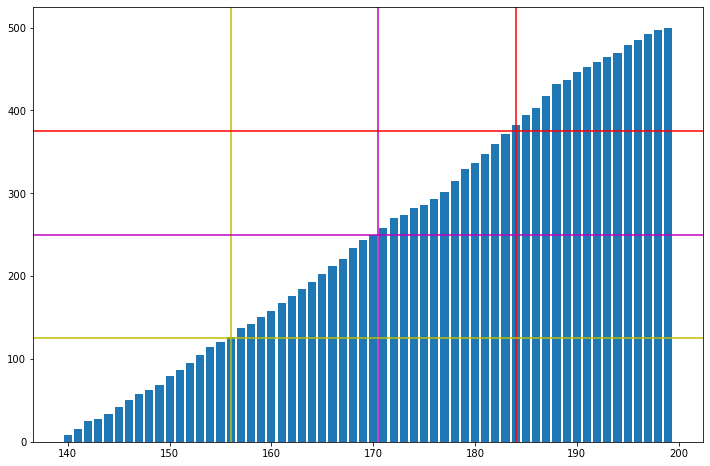

In [22]:
plt.figure(figsize=(12, 8))

plt.bar(height_data['Height'], height_data['cumcounts_height'])

plt.axvline(height_weight_data['Height'].quantile(.25), color='y', label='25%')
plt.axvline(height_weight_data['Height'].quantile(.50), color='m', label='50%')
plt.axvline(height_weight_data['Height'].quantile(.75), color='r', label='75%')

plt.axhline(.25 * num_records, color='y', label='25%')
plt.axhline(.5 * num_records, color='m', label='50%')
plt.axhline(.75 * num_records, color='r', label='75%')

### Calculating Variance

In [23]:
def variance(data):
    
    diffs = 0
    avg = sum(data) / len(data)
    
    for n in data:
        diffs += (n - avg)**2
    
    return (diffs/(len(data)-1))

In [24]:
variance(height_weight_data['Height'])

268.1491623246496

In [25]:
variance(height_weight_data['Weight'])

1048.633266533066

In [26]:
height_weight_data['Height'].var()

268.1491623246493

In [27]:
height_weight_data['Weight'].var()

1048.633266533066

### Standard Deviation

In [28]:
std_height = (variance(height_weight_data['Height'])) ** 0.5

std_height

16.37526067959376

In [29]:
std_weight = (variance(height_weight_data['Weight'])) ** 0.5

std_weight

32.38260746964435

In [30]:
height_weight_data['Height'].std()

16.375260679593755

In [31]:
height_weight_data['Weight'].std()

32.38260746964435

In [32]:
weight_mean = height_weight_data['Weight'].mean()

weight_std = height_weight_data['Weight'].std()

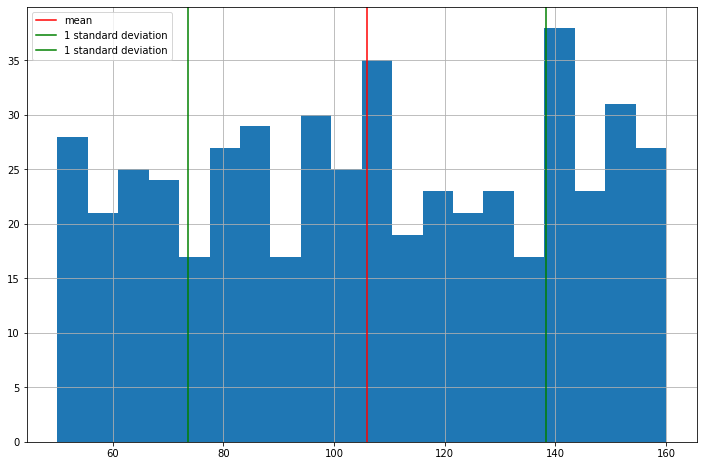

In [33]:
plt.figure(figsize=(12, 8))

height_weight_data['Weight'].hist(bins=20)

plt.axvline(weight_mean, color='r', label='mean')

plt.axvline(weight_mean - weight_std, color='g', label='1 standard deviation')
plt.axvline(weight_mean + weight_std, color='g', label='1 standard deviation')

plt.legend()

In [34]:
listOfSeries = [pd.Series(['Male', 40, 30], index=height_weight_data.columns ), 
                pd.Series(['Female', 66, 37], index=height_weight_data.columns ), 
                pd.Series(['Female', 199, 410], index=height_weight_data.columns ),
                pd.Series(['Male', 202, 390], index=height_weight_data.columns ), 
                pd.Series(['Female', 77, 210], index=height_weight_data.columns ),
                pd.Series(['Male', 88, 203], index=height_weight_data.columns )]

In [35]:
height_weight_updated = height_weight_data.append(listOfSeries , ignore_index=True)

height_weight_updated.tail()

,Gender,Height,Weight
501,Female,66,37
502,Female,199,410
503,Male,202,390
504,Female,77,210
505,Male,88,203


<AxesSubplot:>

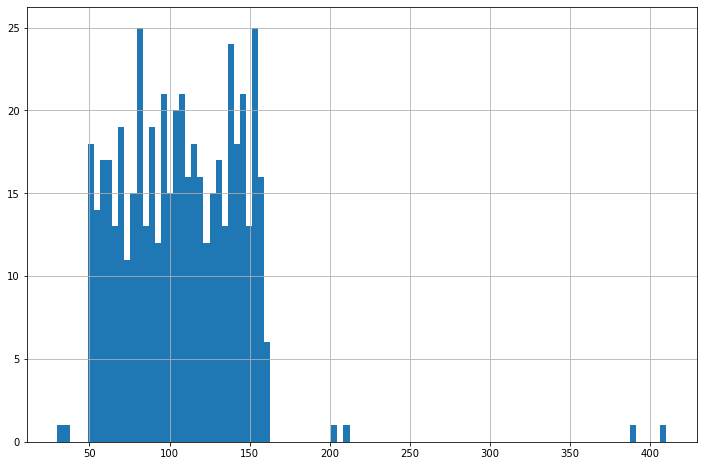

In [36]:
plt.figure(figsize=(12, 8))

height_weight_updated['Weight'].hist(bins=100)

<AxesSubplot:>

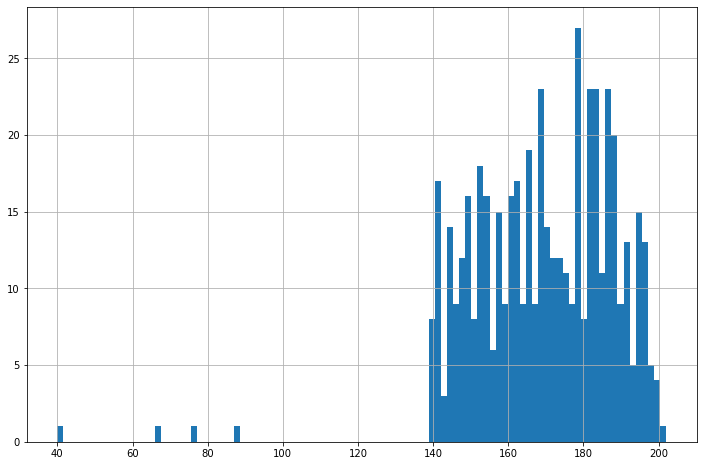

In [37]:
plt.figure(figsize=(12, 8))

height_weight_updated['Height'].hist(bins=100)

In [38]:
height_weight_updated['Height'].quantile(.25)

156.0

In [39]:
q1_height

156.0

In [40]:
height_weight_updated['Height'].quantile(.75)

184.0

In [41]:
q3_height

184.0